# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src="./assets/bricks.jpg">

# Import Statements

In [2]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [3]:
df = pd.read_csv("./data/colors.csv", names=["ID", "COLOUR", "RGB", "IS_TRANSPARENT"], header=0)
df

,ID,COLOUR,RGB,IS_TRANSPARENT
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


In [4]:
df.nunique()

ID                135
COLOUR            135
RGB               124
IS_TRANSPARENT      2
dtype: int64

In [5]:
print("By groupby----------")
print(df.groupby("IS_TRANSPARENT").count())
print("By value_counts()----------")
print(df.IS_TRANSPARENT.value_counts())
print("By Shape----------")
print(f"transparent: {df[df.IS_TRANSPARENT == 't'].shape[0]}")
print(f"opaque: {df[df.IS_TRANSPARENT == 'f'].shape[0]}")
print("By len()----------")
print(f"transparent: {len(df[df.IS_TRANSPARENT == 't'])}")
print(f"opaque: {len(df[df.IS_TRANSPARENT == 'f'])}")
print("By query count----------")
query_transparent = df.query('IS_TRANSPARENT == "t"').IS_TRANSPARENT.count()
print(f"transparent: {query_transparent}")
query_opaque = df.query('IS_TRANSPARENT == "f"').IS_TRANSPARENT.count()
print(f"opaque: {query_opaque}")
print("By sum()----------")
print(f"transparent: {(df.IS_TRANSPARENT == 't').sum()}")
print(f"opaque: {(df.IS_TRANSPARENT == 'f').sum()}")
print("By sum numpy values----------")
print(f"transparent: {(df.IS_TRANSPARENT.values == 't').sum()}")
print(f"opaque: {(df.IS_TRANSPARENT.values == 'f').sum()}")

By groupby----------
                 ID  COLOUR  RGB
IS_TRANSPARENT                  
f               107     107  107
t                28      28   28
By value_counts()----------
f    107
t     28
Name: IS_TRANSPARENT, dtype: int64
By Shape----------
transparent: 28
opaque: 107
By len()----------
transparent: 28
opaque: 107
By query count----------
transparent: 28
opaque: 107
By sum()----------
transparent: 28
opaque: 107
By sum numpy values----------
transparent: 28
opaque: 107


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [6]:
df.IS_TRANSPARENT.value_counts()

f    107
t     28
Name: IS_TRANSPARENT, dtype: int64

**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [7]:
sets = pd.read_csv("./data/sets.csv", header=0, names=["SET_NUMBER", "NAME", "YEAR", "THEME_ID", "NUMBER_OF_PARTS"])
sets

,SET_NUMBER,NAME,YEAR,THEME_ID,NUMBER_OF_PARTS
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [8]:
first_lego_release_year = sets.YEAR.min()
print(f"first_lego_release_year: {first_lego_release_year}")
first_lego_release_year_index = sets.YEAR.idxmin()
print(f"first_lego_release_year_index: {first_lego_release_year_index}")
first_lego_release_year_name = sets.NAME.loc[first_lego_release_year_index]
print(f"first_lego_release_year_name: {first_lego_release_year_name}")

first_lego_release_year: 1949
first_lego_release_year_index: 9521
first_lego_release_year_name: Extra-Large Gift Set (ABB)


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [9]:
products_on_first_year = (sets['YEAR'] == first_lego_release_year).value_counts()
print(products_on_first_year)

False    15705
True         5
Name: YEAR, dtype: int64


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [10]:
first_year_set = (sets["YEAR"] == 1949).value_counts()
print(first_year_set)
print(sets[sets["YEAR"] == 1949])

False    15705
True         5
Name: YEAR, dtype: int64
     SET_NUMBER                               NAME  YEAR  THEME_ID  \
9521    700.1-1         Extra-Large Gift Set (ABB)  1949       365   
9534    700.2-1               Large Gift Set (ABB)  1949       365   
9539    700.3-1              Medium Gift Set (ABB)  1949       365   
9544    700.A-1              Small Brick Set (ABB)  1949       371   
9545    700.B-1  Small Doors and Windows Set (ABB)  1949       371   

      NUMBER_OF_PARTS  
9521              142  
9534              178  
9539              142  
9544               24  
9545               12  


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [20]:
sets_by_year = sets.groupby("YEAR").count()
print(sets_by_year.SET_NUMBER)

YEAR
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: SET_NUMBER, Length: 71, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

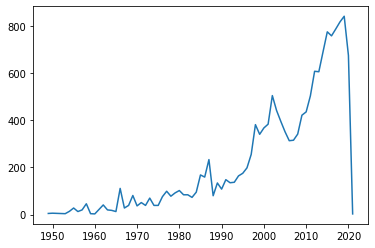

In [15]:
plt.plot(sets_by_year.index, sets_by_year.SET_NUMBER)
plt.show

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

In [18]:
refined_sets_by_year = sets_by_year[:-2]
refined_sets_by_year.tail()

,SET_NUMBER,NAME,THEME_ID,NUMBER_OF_PARTS
YEAR,,,,
2015,774,774,774,774
2016,757,757,757,757
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


<function matplotlib.pyplot.show(close=None, block=None)>

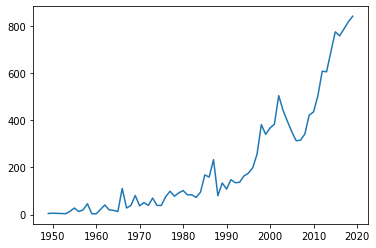

In [16]:
plt.plot(refined_sets_by_year.index, refined_sets_by_year.SET_NUMBER)
plt.show

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [21]:
themes_by_year = sets.groupby("YEAR").agg({"THEME_ID": pd.Series.nunique})
print(themes_by_year)
themes_by_year_2 = sets.groupby("YEAR").agg({"THEME_ID": pd.Series.nunique, "NUMBER_OF_PARTS": pd.Series.nunique})
print(themes_by_year_2)

      THEME_ID
YEAR          
1949         2
1950         1
1953         2
1954         2
1955         4
...        ...
2017        89
2018        93
2019        78
2020        82
2021         1

[71 rows x 1 columns]
      THEME_ID  NUMBER_OF_PARTS
YEAR                           
1949         2                4
1950         1                1
1953         2                4
1954         2                5
1955         4               22
...        ...              ...
2017        89              325
2018        93              339
2019        78              336
2020        82              320
2021         1                1

[71 rows x 2 columns]


In [22]:
themes_by_year.rename(columns={"THEME_ID" : "NUMBER_OF_THEMES"}, inplace=True)
themes_by_year

,NUMBER_OF_THEMES
YEAR,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

<function matplotlib.pyplot.show(close=None, block=None)>

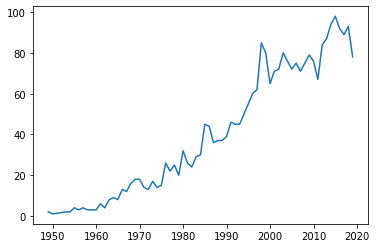

In [23]:
refined_themes_by_year = themes_by_year[:-2]
plt.plot(refined_themes_by_year.index, refined_themes_by_year.NUMBER_OF_THEMES)
plt.show

### Line Charts with Two Seperate Axes

<function matplotlib.pyplot.show(close=None, block=None)>

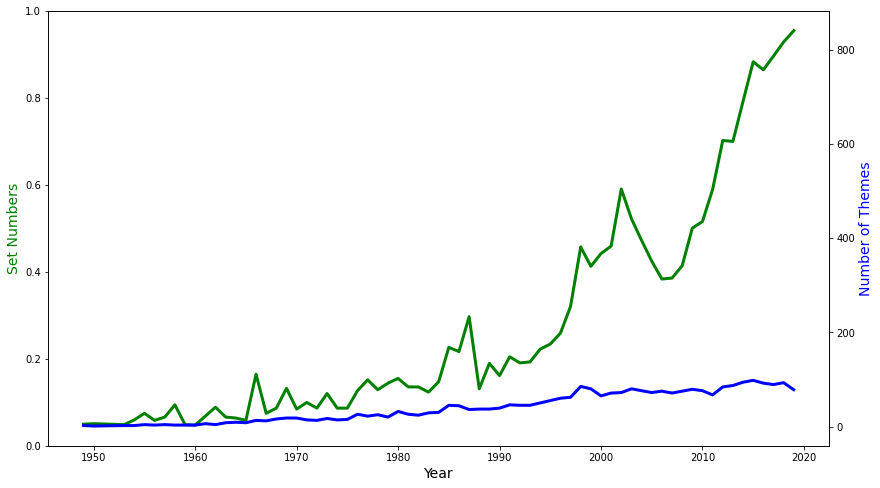

In [24]:
plt.figure(figsize=(14, 8))

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis, use twiny() for sharing same y-axis


plt.plot(refined_sets_by_year.index, refined_sets_by_year.SET_NUMBER, color="green", linewidth=3)
plt.plot(refined_themes_by_year.index, refined_themes_by_year.NUMBER_OF_THEMES, color="blue", linewidth=3)

ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("Set Numbers", color="green", fontsize=14)
ax2.set_ylabel("Number of Themes", color="blue", fontsize=14)
# plt.yticks(fontsize=14)

plt.show

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [25]:
parts_per_set = sets.groupby("YEAR").agg({"NUMBER_OF_PARTS": pd.Series.mean})
parts_per_set

,NUMBER_OF_PARTS
YEAR,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


<function matplotlib.pyplot.show(close=None, block=None)>

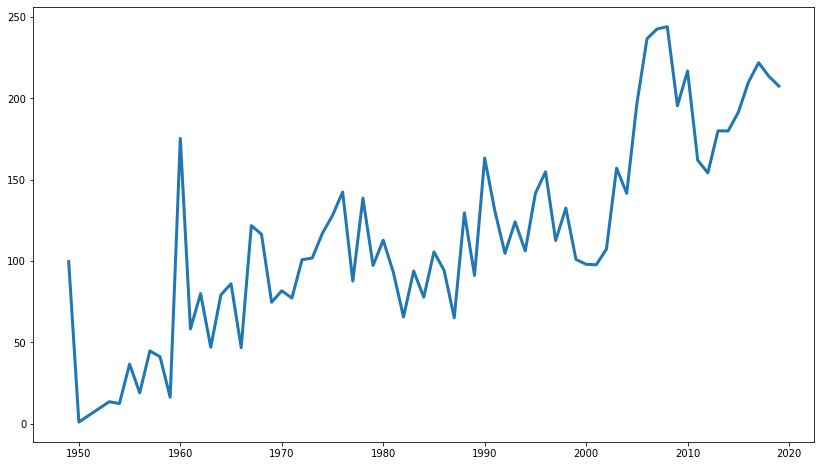

In [26]:
refined_parts_per_set = parts_per_set[:-2]

plt.figure(figsize=(14, 8))
plt.plot(refined_parts_per_set.index, refined_parts_per_set.NUMBER_OF_PARTS, linewidth=3)
plt.show

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

<function matplotlib.pyplot.show(close=None, block=None)>

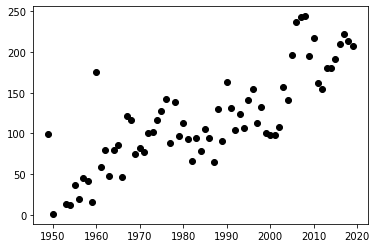

In [27]:
x = refined_parts_per_set.index
y = refined_parts_per_set.NUMBER_OF_PARTS

plt.scatter(x, y, c="black")
plt.show

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

<img src="./assets/rebrickable_schema.png">

In [28]:
sets_theme_count = sets.THEME_ID.value_counts()
sets_theme_count

158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: THEME_ID, Length: 571, dtype: int64

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [29]:
themes = pd.read_csv("./data/themes.csv", header=0, names=["ID", "NAME", "PARENT_ID"])
print(themes)
print(themes[themes.ID == 158])

      ID                   NAME  PARENT_ID
0      1                Technic        NaN
1      2         Arctic Technic        1.0
2      3            Competition        1.0
3      4         Expert Builder        1.0
4      5                  Model        1.0
..   ...                    ...        ...
591  705               Iron Man      696.0
592  706             Spider-Man      696.0
593  707                  X-Men      696.0
594  708  The LEGO Batman Movie      697.0
595  709               LEGO Art        NaN

[596 rows x 3 columns]
      ID       NAME  PARENT_ID
150  158  Star Wars        NaN


In [30]:
print(themes[themes["NAME"] == "Star Wars"])
print(themes[themes.NAME == "Star Wars"])

      ID       NAME  PARENT_ID
17    18  Star Wars        1.0
150  158  Star Wars        NaN
174  209  Star Wars      207.0
211  261  Star Wars      258.0
      ID       NAME  PARENT_ID
17    18  Star Wars        1.0
150  158  Star Wars        NaN
174  209  Star Wars      207.0
211  261  Star Wars      258.0


In [31]:
print(sets[sets.THEME_ID == 18])
print(sets[sets.THEME_ID == 158])

      SET_NUMBER                                NAME  YEAR  THEME_ID  \
8786     65081-1  R2-D2 / C-3PO Droid Collectors Set  2002        18   
12051     8000-1                           Pit Droid  2000        18   
12058     8001-1                        Battle Droid  2000        18   
12066     8002-1                     Destroyer Droid  2000        18   
12071     8007-1                               C-3PO  2001        18   
12072     8008-1                        Stormtrooper  2001        18   
12073     8009-1                               R2-D2  2002        18   
12074     8010-1                         Darth Vader  2002        18   
12081     8011-1                          Jango Fett  2002        18   
12083     8012-1                  Super Battle Droid  2002        18   
15273    K8008-1      Darth Vader / Stormtrooper Kit  2002        18   

       NUMBER_OF_PARTS  
8786                 1  
12051              223  
12058              336  
12066              567  
12071     

In [32]:
print(sets[sets.THEME_ID == 209])
print(sets[sets.THEME_ID == 261])

      SET_NUMBER                            NAME  YEAR  THEME_ID  \
11013    75023-1  Star Wars Advent Calendar 2013  2013       209   
11046    75056-1  Star Wars Advent Calendar 2014  2014       209   
11080    75097-1  Star Wars Advent Calendar 2015  2015       209   
11131    75146-1  Star Wars Advent Calendar 2016  2016       209   
11173    75184-1  Star Wars Advent Calendar 2017  2017       209   
11206    75213-1  Star Wars Advent Calendar 2018  2018       209   
11245    75245-1  Star Wars Advent Calendar 2019  2019       209   
11281    75279-1  Star Wars Advent Calendar 2020  2020       209   
12019     7958-1  Star Wars Advent Calendar 2011  2011       209   
14352     9509-1  Star Wars Advent Calendar 2012  2012       209   

       NUMBER_OF_PARTS  
11013              254  
11046              273  
11080              291  
11131              282  
11173              309  
11206              307  
11245              280  
11281              312  
12019              267  
1

### Merging (i.e., Combining) DataFrames based on a Key


In [33]:
sets_theme_count = pd.DataFrame({
    "ID": sets_theme_count.index,
    "SET_COUNT": sets_theme_count.values
})
sets_theme_count

,ID,SET_COUNT
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329
...,...,...
566,307,1
567,215,1
568,361,1
569,210,1


In [34]:
merged_df = pd.merge(sets_theme_count, themes, on="ID")
merged_df

,ID,SET_COUNT,NAME,PARENT_ID
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0
...,...,...,...,...
566,307,1,Aquazone,NaN
567,215,1,Pirates,207.0
568,361,1,Skull Spiders,324.0
569,210,1,Belville,207.0


<function matplotlib.pyplot.show(close=None, block=None)>

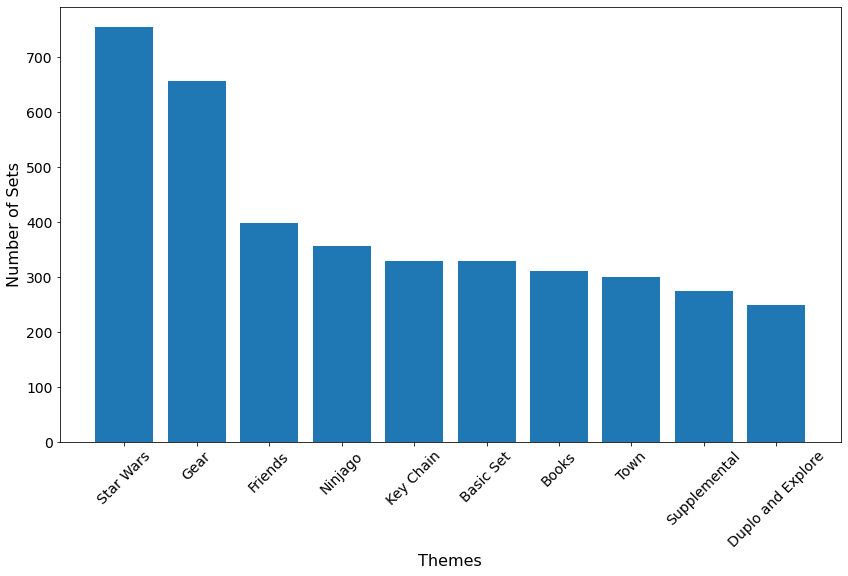

In [35]:
plt.figure(figsize=(14, 8))
plt.xlabel("Themes", fontsize=16)
plt.ylabel("Number of Sets", fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.bar(merged_df.NAME[:10], merged_df.SET_COUNT[:10])

plt.show